# Project: Analyzing Movie Reviews

In this project, I'll be working with a dataset that contains information on how major movie review services rated movies. The dataset is stored in the "fandango_score_comparison.csv" file.

# I. Movie Reviews

In [1]:
import pandas as pd

movie_reviews = pd.read_csv("fandango_score_comparison.csv")
movie_reviews.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


Each row represents a single movie.

Each column contains information about how the online movie review services RottenTomatoes, Metacritic, IMDB, and Fandango rated the movie. 

The dataset was put together to help detect bias in the movie review sites. Each of these sites has 2 types of score:
1. User scores, which aggregate user reviews, and 
2. Critic score, which aggregate professional critical reviews of the movie. 

Each service puts their ratings on a different scale:
1. RottanTomatoes: 0-100, in increments of 1
2. Metacritic: 0-100, in increments of 1
3. IMDB: 0-10, in increments of .1
4. Fandango: 0-5, in increments of .5

Typically, the primary score shown by the sites will be the Critic score.

To make things easier to compare scores across services, I normalized the scale and rounded up the ratings. Any columns with the suffix "_norm" is the corresponding column changed to a 0-5 scale. For example, RT_norm takes the RottenTomatoes column and turns it into a 0-5 scale from a 0-100 scale. Any column with the suffix "_round" is the rounded version of another column. For example, RT_user_norm_round rounds the RT_user_norm column to the nearest .5.

# II. Histograms

Let's do some statistical exploration of the ratings. Specifically, we'll focus on the "Metacritic_norm_round" and "Fandango_Stars columns to see how they differ in terms of review scores

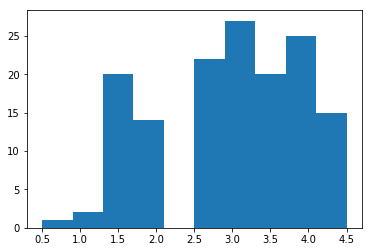

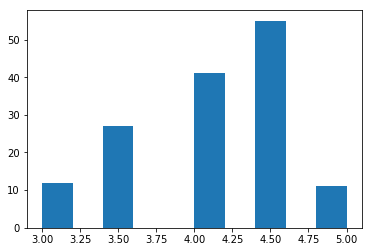

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movie_reviews["Metacritic_norm_round"])
plt.show()

plt.hist(movie_reviews["Fandango_Stars"])
plt.show()

There are some low ratings for movies in Metacritic, while Fandango only have movies ratings from 3 or higher. The Fandango reviews are centered around 4-4.5, and Metacritic are centered around 3-3.5

# III. Mean, Median, and Standard Deviation

Let's quantify the differences between the mean, median and standard deviation to the above ratings to figure out how different they are

In [3]:
import numpy as np

fandango_stars_mean = movie_reviews["Fandango_Stars"].mean()
fandango_stars_median = movie_reviews["Fandango_Stars"].median()
fandango_stars_std = movie_reviews["Fandango_Stars"].std()
print("Fandango Stats:")
print(fandango_stars_mean)
print(fandango_stars_median)
print(fandango_stars_std)

print("\n")

metacritic_norm_mean = movie_reviews["Metacritic_norm_round"].mean()
metacritic_norm_median = movie_reviews["Metacritic_norm_round"].median()
metacritic_norm_std = movie_reviews["Metacritic_norm_round"].std()

print("Metacritic Stats:")
print(metacritic_norm_mean)
print(metacritic_norm_median)
print(metacritic_norm_std)

Fandango Stats:
4.089041095890411
4.0
0.5403859779787333


Metacritic Stats:
2.9726027397260273
3.0
0.9909605613743364


The Fandango ratings median is lower than the mean Fandango score because a few high ratings are dragging up the mean. The Metacritic median score appears higher than the mean Metacritic because there are a few low reviews dragging down the mean. 

Fandango rating appear clustered between 3 and 5, since average is around 4. Fandango have a much narrower random than Metacritic reviews, which go from 0 to 5. 

Fandango ratings in general appear to be higher than metacritic ratings

# IV. Scatter Plots

We know the ratings tend to differ, but we don't know which movies tend to be the largest outliers. We can find this by making a scatterplot, then looking at which movies are far away from the others

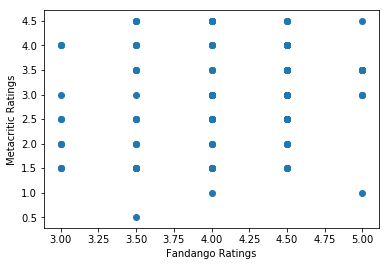

In [4]:
plt.scatter(movie_reviews["Fandango_Stars"], movie_reviews["Metacritic_norm_round"])
plt.xlabel("Fandango Ratings")
plt.ylabel("Metacritic Ratings")
plt.show()

Several movies appear to have low ratings in Metacritic and high ratings in Fandango. Let's explore this further by finding the differences between the columns

In [5]:
movie_reviews["fm_diff"] = np.abs(movie_reviews["Fandango_Stars"] - movie_reviews["Metacritic_norm_round"])
movie_reviews = movie_reviews.sort_values(by="fm_diff", ascending=False)
movie_reviews.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


# V. Correlations

Let's see what the correlation coefficient between Fandango_Stars and Metacritic_norm_round is. This will help us determine if Fandango consistently has higher scores than Metacritic, or if only a few movies were assigned higher ratings

In [6]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(movie_reviews["Fandango_Stars"], movie_reviews["Metacritic_norm_round"])
print(r_value)

0.178449190739


The low r_value indicates that there are low correlation between the two ratings. There are reasons to suspect that Fandango is rating movies higher for whatever reason.

Let's create a linear regression for relating Metacritic_norm_round and Fandango_Stars

In [7]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(movie_reviews["Metacritic_norm_round"], movie_reviews["Fandango_Stars"])

pred_3 = 3 * slope + intercept
print(pred_3)

4.09170715282


In [8]:
pred_1 = 1 * slope + intercept
print(pred_1)

3.89708499687


In [9]:
pred_5 = 5 * slope + intercept
print(pred_5)

4.28632930877


As we can see, our linear regression line predicts Fandango would rate any movies high regardless of the rating in Metacritic

# VI. Finding Residuals

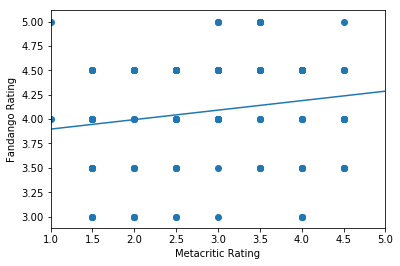

In [11]:
plt.scatter(movie_reviews["Metacritic_norm_round"], movie_reviews["Fandango_Stars"])
plt.plot([1.0, 5.0], [pred_1, pred_5])
plt.xlabel("Metacritic Rating")
plt.ylabel("Fandango Rating")
plt.xlim(1,5)
plt.show()

Based on the plot, we can tell that the two variables are not linearly related.